In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, confusion_matrix

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train_rf = pd.read_csv("datasets/X_train_rf.csv")
X_test_rf = pd.read_csv("datasets/X_test_rf.csv")
y_train = pd.read_csv("datasets/y_train.csv")
y_test = pd.read_csv("datasets/y_test.csv")

In [ ]:
X_train_rf.head()

1030      1121      1122      1074      1264       982      1031  \
0  0.113725  0.192157  0.164706  0.156863  0.176471  0.176471  0.109804   
1  0.996078  0.254902  0.231373  0.560784  0.972549  1.000000  0.988235   
2  0.360784  0.792157  0.945098  0.819608  1.000000  0.376471  0.627451   
3  0.101961  0.152941  0.156863  0.149020  0.105882  0.121569  0.113725   
4  1.000000  0.427451  0.400000  0.349020  0.443137  0.960784  1.000000   

       1078      1169      1170  ...      1271      1075      1218      1320  \
0  0.141176  0.211765  0.196078  ...  0.164706  0.141176  0.223529  0.207843   
1  0.941176  0.333333  0.537255  ...  0.772549  0.482353  0.937255  0.917647   
2  0.439216  0.917647  0.980392  ...  0.949020  0.874510  0.996078  0.992157   
3  0.086275  0.156863  0.164706  ...  0.121569  0.117647  0.168627  0.129412   
4  1.000000  0.329412  0.498039  ...  0.952941  0.431373  0.576471  0.960784   

       1167      1368      1509      1032      1221      1172  
0  0.109804  0.215686  0.164706  0.133333  0.184314  0.207843  
1  0.552941  0.960784  0.356863  0.733333  0.576471  0.580392  
2  0.905882  0.988235  0.878431  0.890196  0.482353  0.796078  
3  0.094118  0.145098  0.121569  0.101961  0.160784  0.149020  
4  0.921569  0.964706  0.564706  1.000000  1.000000  0.976471  

[5 rows x 53 columns]

### Silhouette Method Graph
The silhouette method graph presents the silhouette score for different numbers of clusters. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better defined clusters.

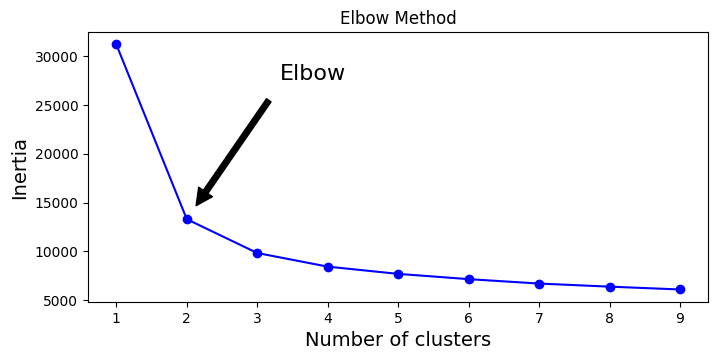

In [60]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_rf)
                for k in range(1, 10)]
                
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.35, 0.8),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.title('Elbow Method')
plt.show()

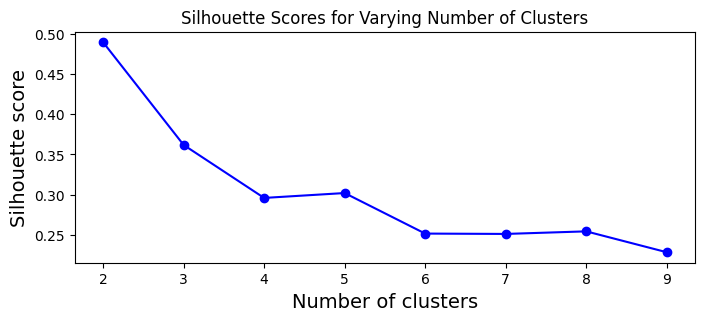

In [52]:
from sklearn.metrics import silhouette_score

# Compute silhouette scores for each k (excluding k = 1)
silhouette_scores = [silhouette_score(X_train_rf, model.labels_)
                              for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title('Silhouette Scores for Varying Number of Clusters')
plt.show()

The silhouette score is highest for two clusters, indicating the best cohesion and separation at this point.

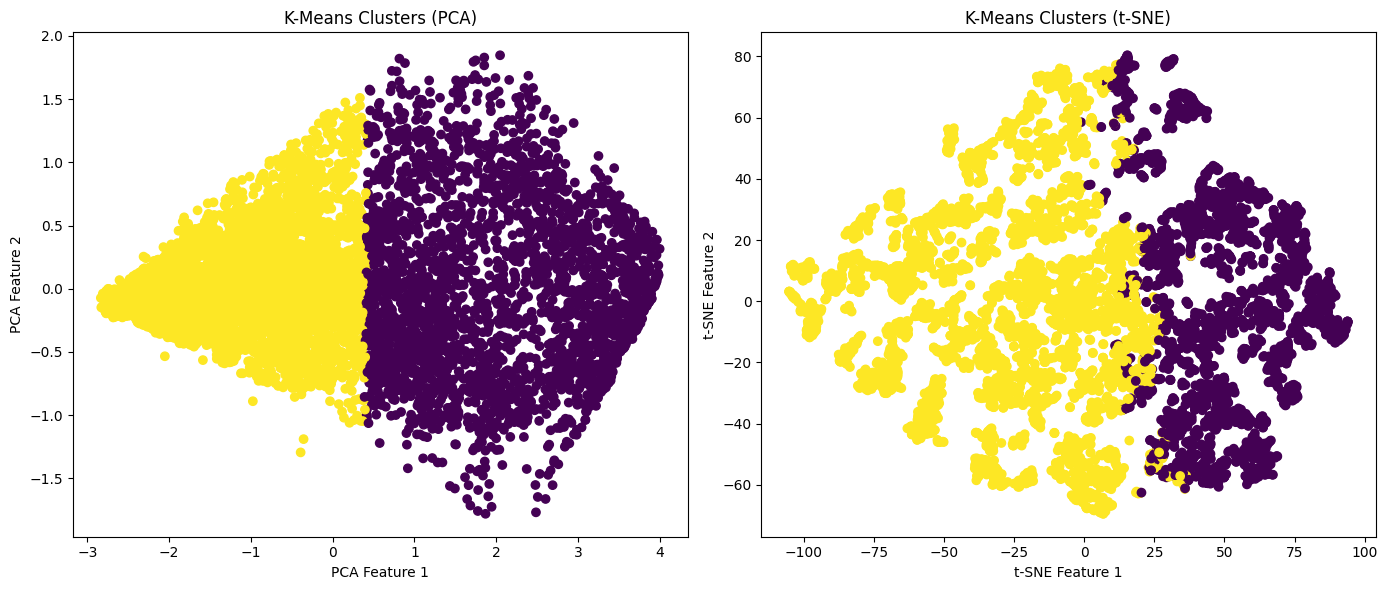

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_rf)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_rf)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_rf)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot PCA clusters
axs[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_)
axs[0].set_title('K-Means Clusters (PCA)')
axs[0].set_xlabel('PCA Feature 1')
axs[0].set_ylabel('PCA Feature 2')

# Plot t-SNE clusters
axs[1].scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=kmeans.labels_)
axs[1].set_title('K-Means Clusters (t-SNE)')
axs[1].set_xlabel('t-SNE Feature 1')
axs[1].set_ylabel('t-SNE Feature 2')

# Display the plots
plt.tight_layout()  # Adjust the subplots to fit into the figure area.
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.49
For n_clusters = 3, the average silhouette_score is : 0.361
For n_clusters = 4, the average silhouette_score is : 0.296
For n_clusters = 5, the average silhouette_score is : 0.302
For n_clusters = 6, the average silhouette_score is : 0.251
For n_clusters = 7, the average silhouette_score is : 0.25
For n_clusters = 8, the average silhouette_score is : 0.255
For n_clusters = 9, the average silhouette_score is : 0.228
For n_clusters = 10, the average silhouette_score is : 0.227


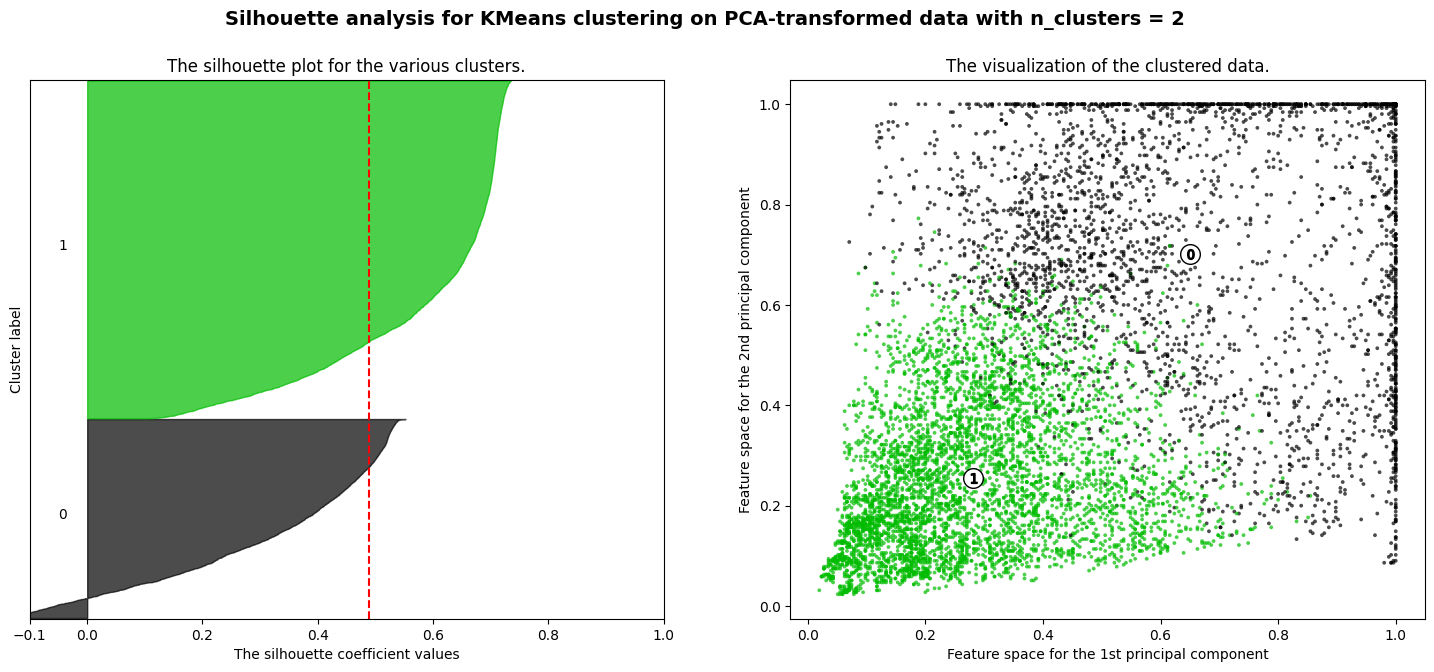

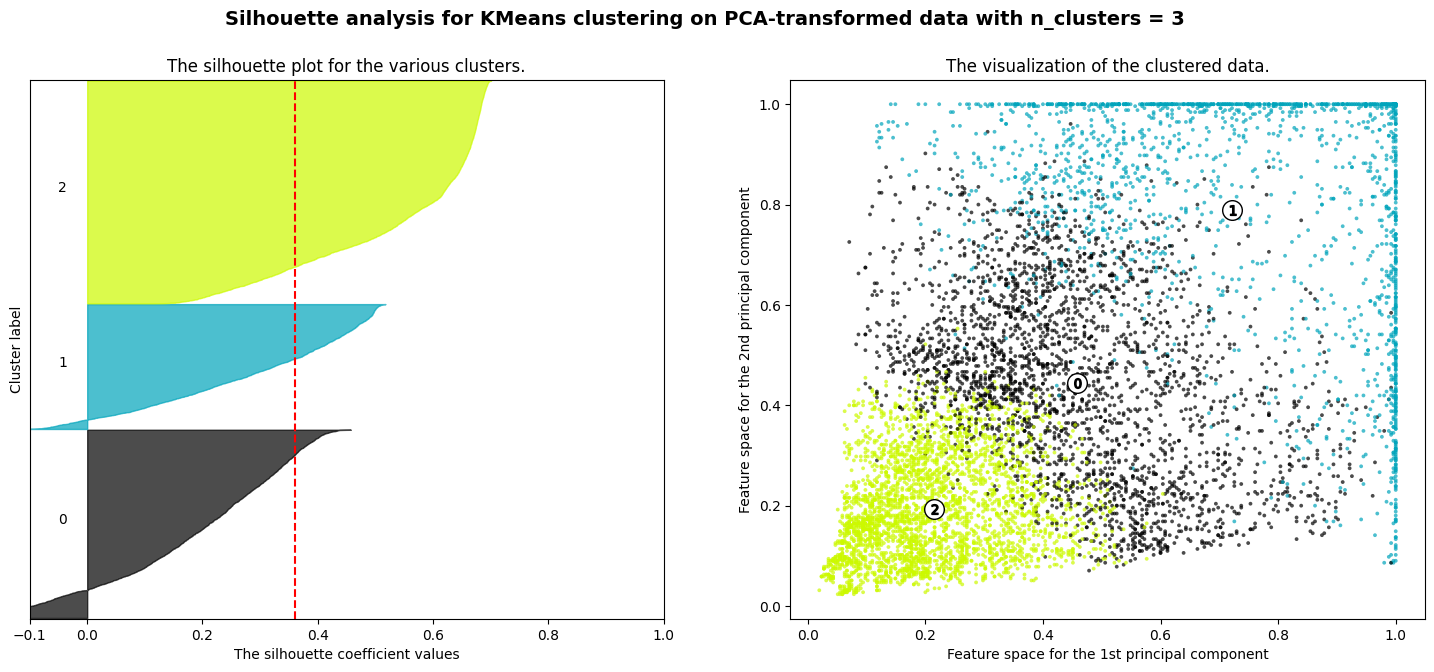

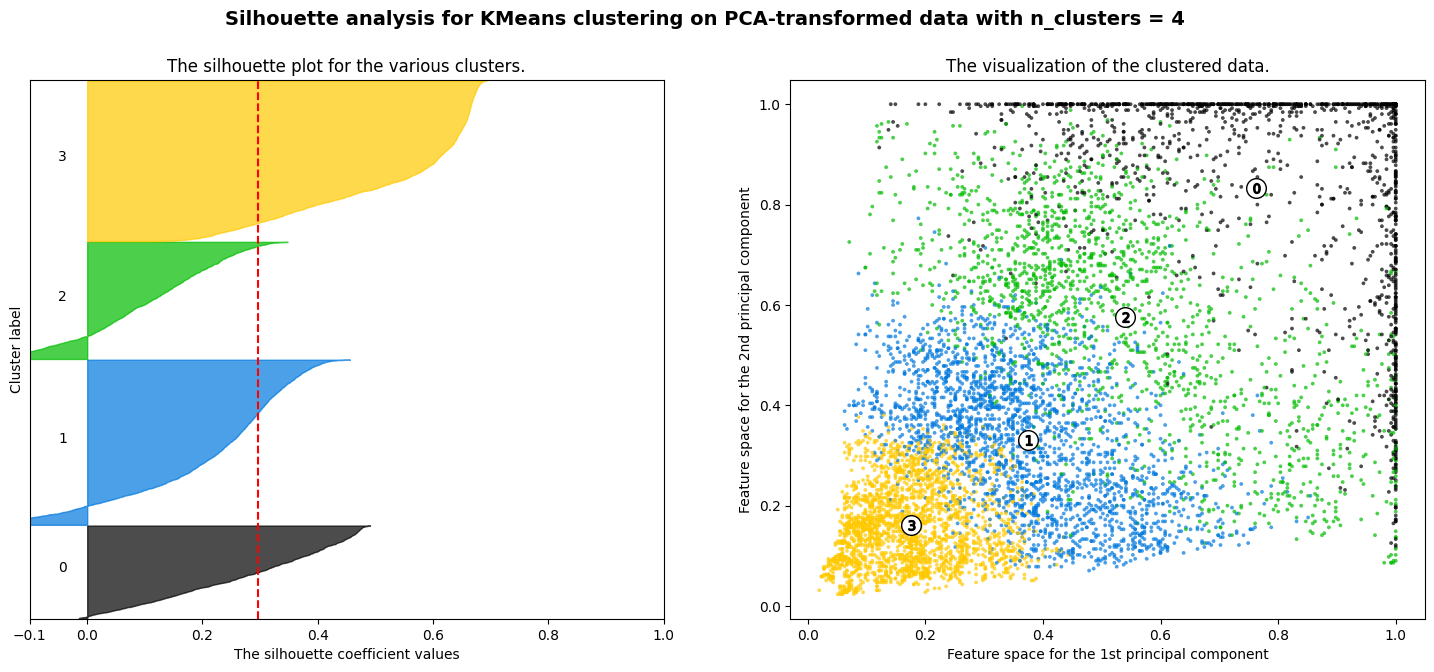

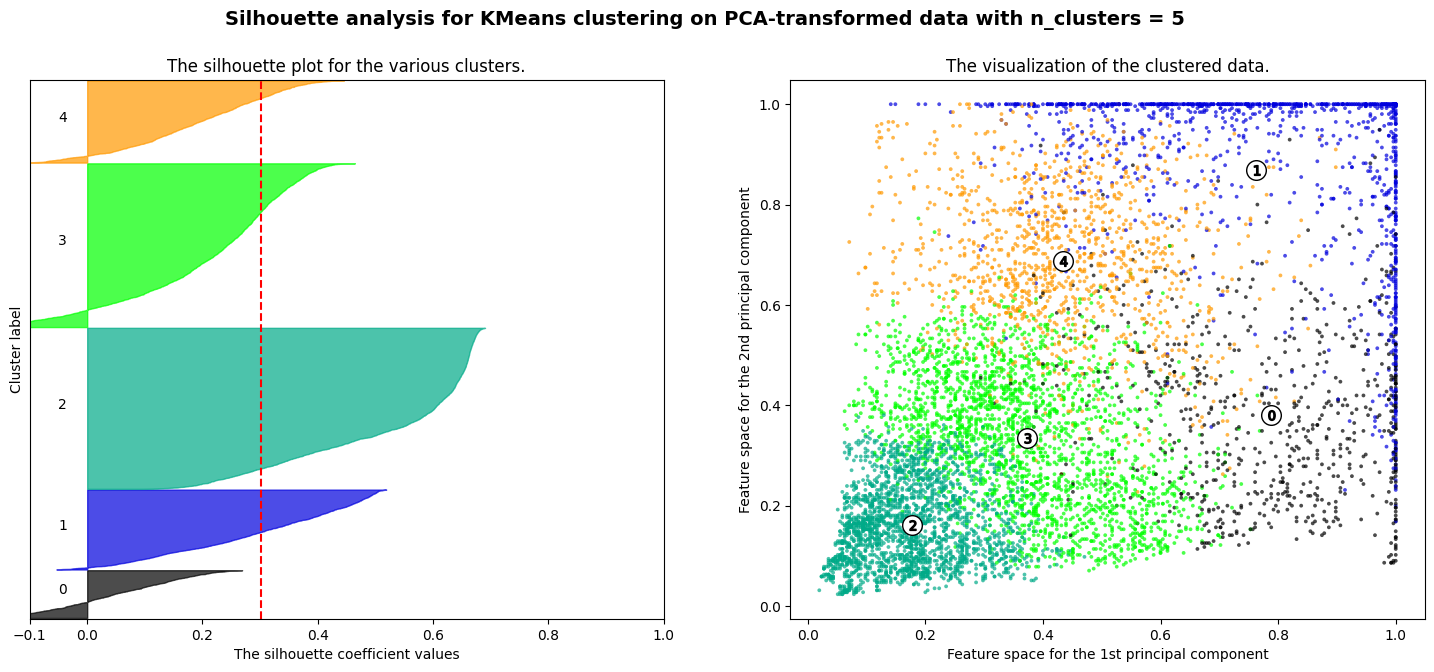

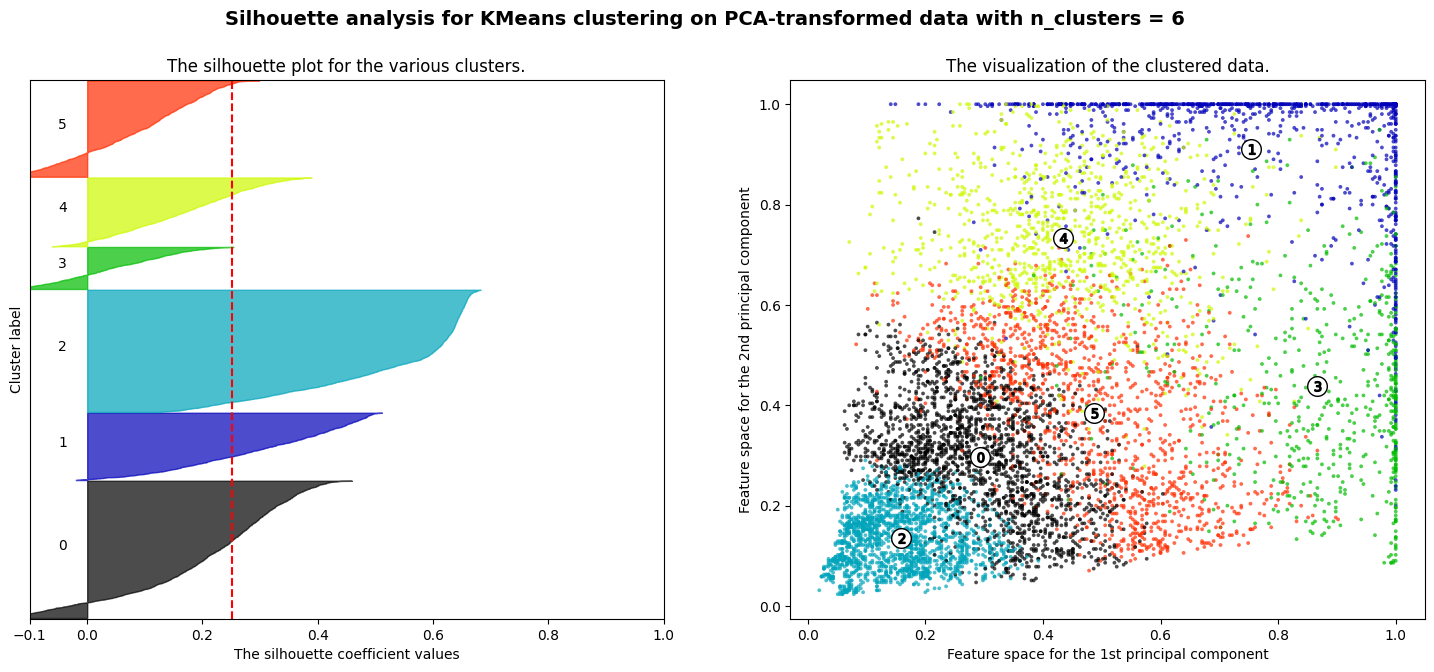

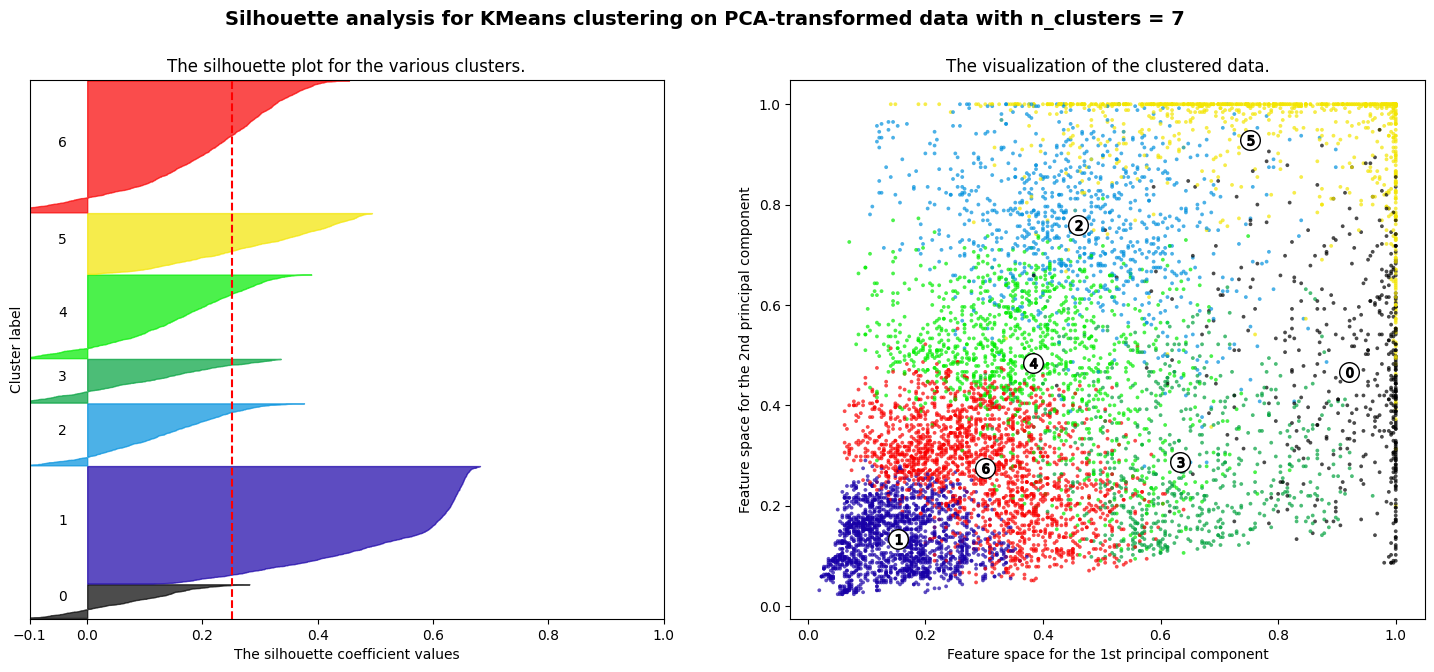

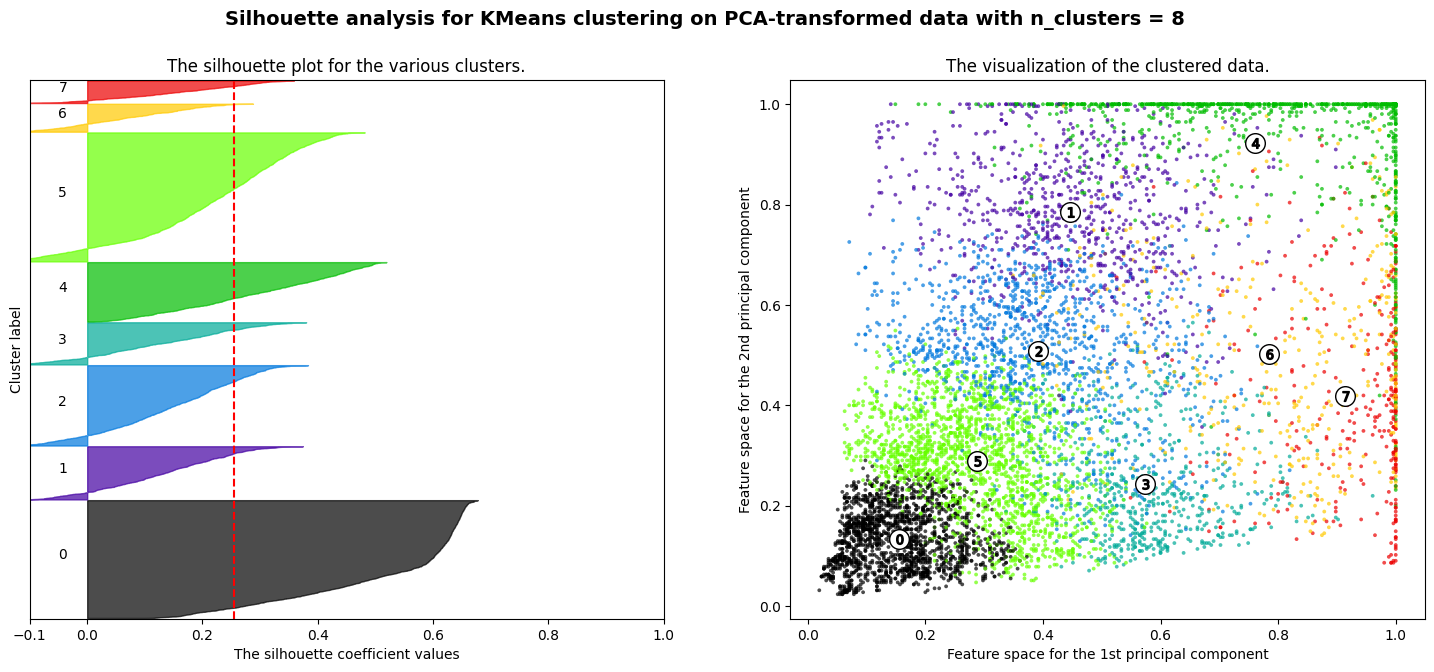

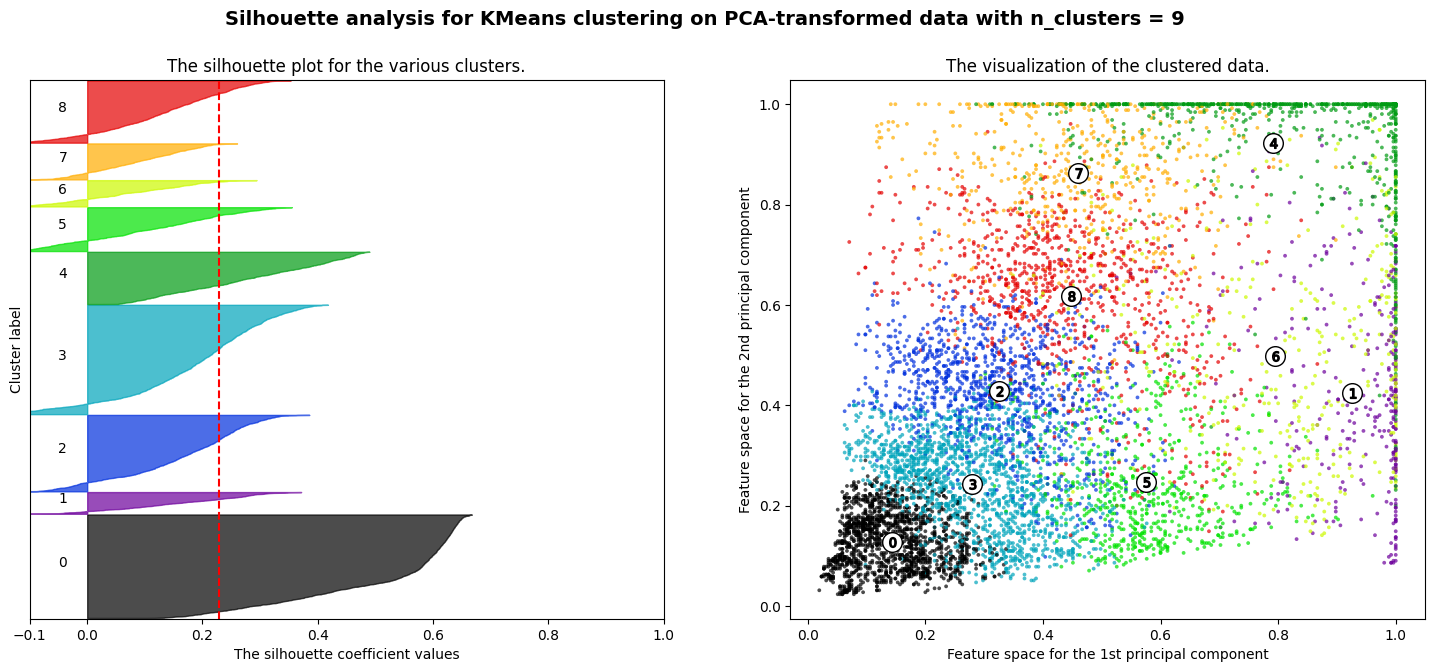

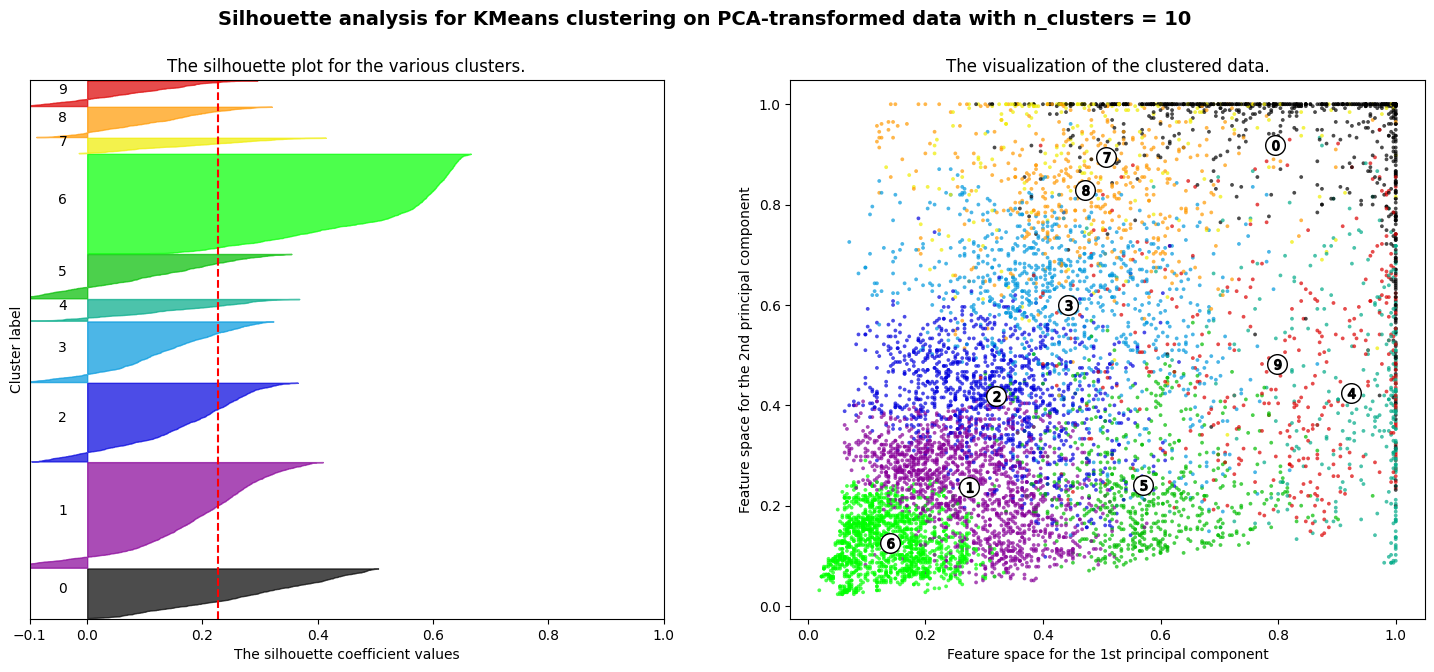

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# Convert the DataFrame to a NumPy array
X = X_train_rf.to_numpy()
y = y_train.to_numpy().ravel()

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg.round(3)}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st principal component")
    ax2.set_ylabel("Feature space for the 2nd principal component")

    plt.suptitle((f"Silhouette analysis for KMeans clustering on PCA-transformed data "
                  f"with n_clusters = {n_clusters}"),
                 fontsize=14, fontweight='bold')

plt.show()

### Implementation of different clustering algorithms for hard and soft clustering

In [59]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

X = X_train_rf.values

# K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels)

# Gaussian Mixture Models
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X)
gmm_silhouette = silhouette_score(X, gmm_labels)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X)
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)

# Print silhouette scores
print(f'K-Means Silhouette Score: {kmeans_silhouette.round(3)}')
print(f'GMM Silhouette Score: {gmm_silhouette.round(3)}')
print(f'Hierarchical Silhouette Score: {hierarchical_silhouette.round(3)}')

K-Means Silhouette Score: 0.49
GMM Silhouette Score: 0.287
Hierarchical Silhouette Score: 0.353


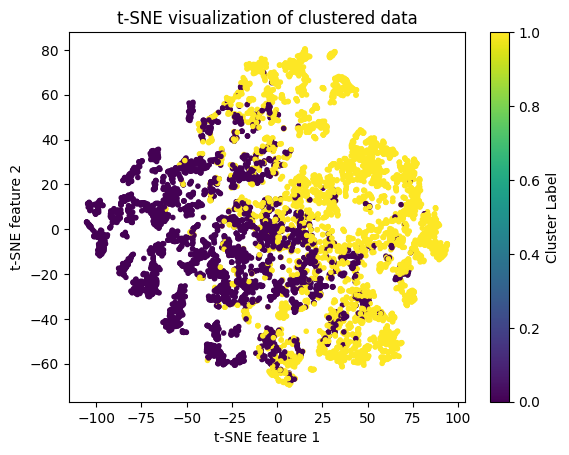

In [46]:
# Choosing the best n_clusters
gmm = GaussianMixture(n_components=2, random_state=42)
cluster_labels = gmm.fit_predict(X_train_rf)

# Perform t-SNE embedding
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_rf)

# Plot t-SNE
# plt.figure(figsize=(10, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=cluster_labels, cmap='viridis', marker='.')
plt.title('t-SNE visualization of clustered data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

### Now let's try to use 2 labels dataset to see if there are any differences

In [40]:
# Filter the training and test sets to only include classes 1 and 2
X_train_filtered = X_train_rf[(y_train["0"] == 1) | (y_train["0"] == 2)]
y_train_filtered = y_train[(y_train["0"] == 1) | (y_train["0"] == 2)]

X_test_filtered = X_test_rf[(y_test["0"] == 1) | (y_test["0"] == 2)]
y_test_filtered = y_test[(y_test["0"] == 1) | (y_test["0"] == 2)]

# Reset index
X_train_filtered.reset_index(drop=True, inplace=True)
y_train_filtered.reset_index(drop=True, inplace=True)
X_test_filtered.reset_index(drop=True, inplace=True)
y_test_filtered.reset_index(drop=True, inplace=True)

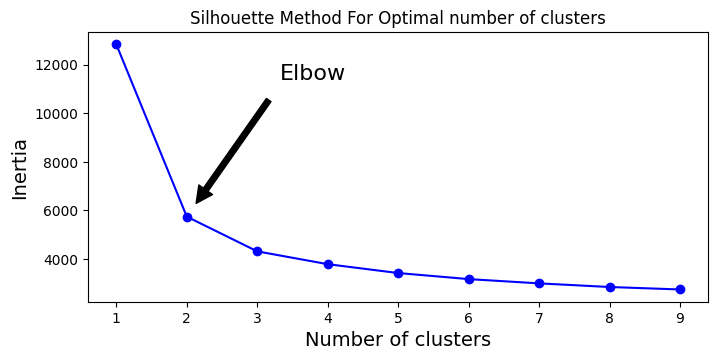

In [47]:
kmeans_per_k_2_labels = [KMeans(n_clusters=k, random_state=42).fit(X_train_filtered)
                for k in range(1, 10)]
                
inertias_2_labels = [model.inertia_ for model in kmeans_per_k_2_labels]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias_2_labels, "bo-")
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias_2_labels[1]),
             xytext=(0.35, 0.8),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.title('Silhouette Method For Optimal number of clusters')
plt.show()

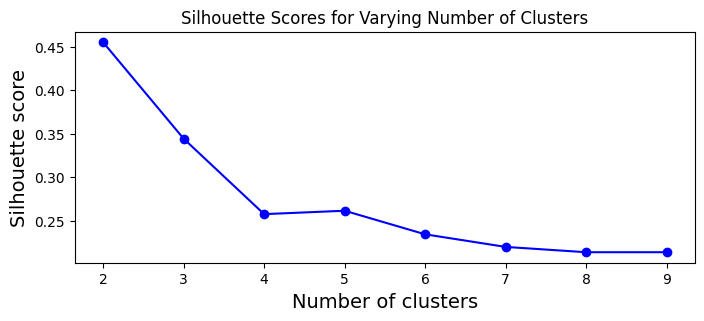

In [51]:
from sklearn.metrics import silhouette_score

# Compute silhouette scores for each k (excluding k = 1)
silhouette_scores_2_labels = [silhouette_score(X_train_filtered, model.labels_)
                              for model in kmeans_per_k_2_labels[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores_2_labels, "bo-")
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title('Silhouette Scores for Varying Number of Clusters')
plt.show()


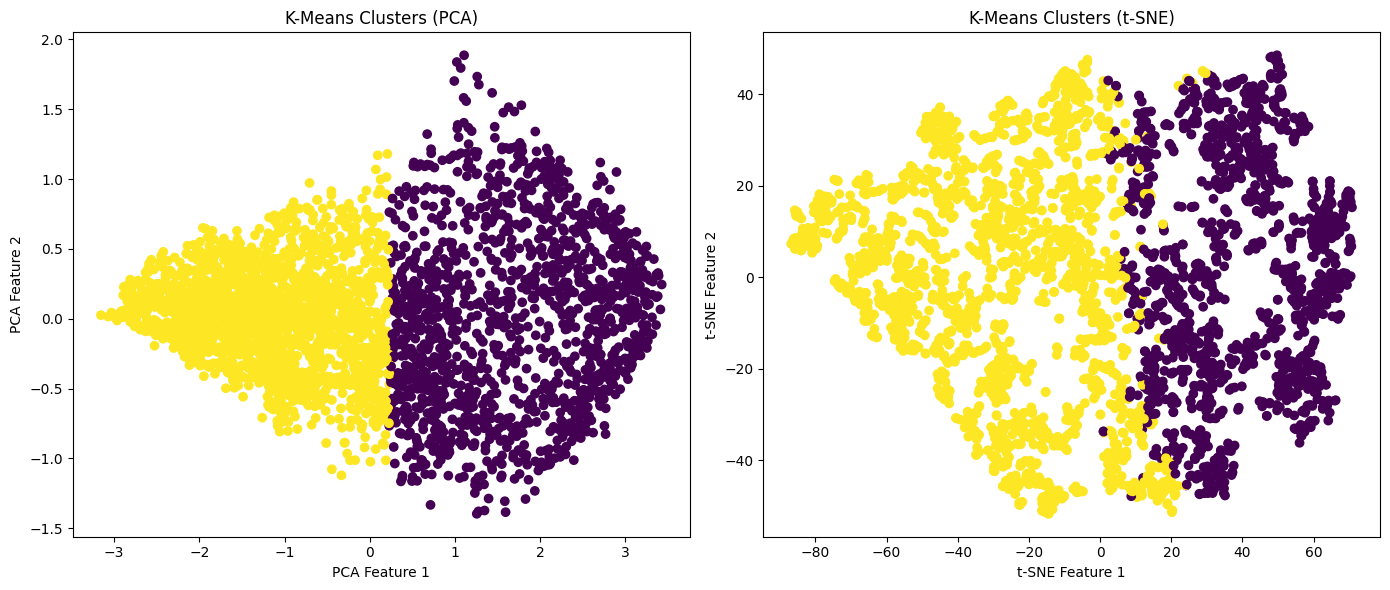

In [53]:
# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_filtered)

# Apply PCA 
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_filtered)

# Apply t-SNE 
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_filtered)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot PCA clusters
axs[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_)
axs[0].set_title('K-Means Clusters (PCA)')
axs[0].set_xlabel('PCA Feature 1')
axs[0].set_ylabel('PCA Feature 2')

# Plot t-SNE clusters
axs[1].scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=kmeans.labels_)
axs[1].set_title('K-Means Clusters (t-SNE)')
axs[1].set_xlabel('t-SNE Feature 1')
axs[1].set_ylabel('t-SNE Feature 2')

# Display the plots
plt.tight_layout()
plt.show()


For n_clusters = 2, the average silhouette_score is : 0.455
For n_clusters = 3, the average silhouette_score is : 0.344
For n_clusters = 4, the average silhouette_score is : 0.257
For n_clusters = 5, the average silhouette_score is : 0.261
For n_clusters = 6, the average silhouette_score is : 0.235
For n_clusters = 7, the average silhouette_score is : 0.22
For n_clusters = 8, the average silhouette_score is : 0.213
For n_clusters = 9, the average silhouette_score is : 0.214
For n_clusters = 10, the average silhouette_score is : 0.209


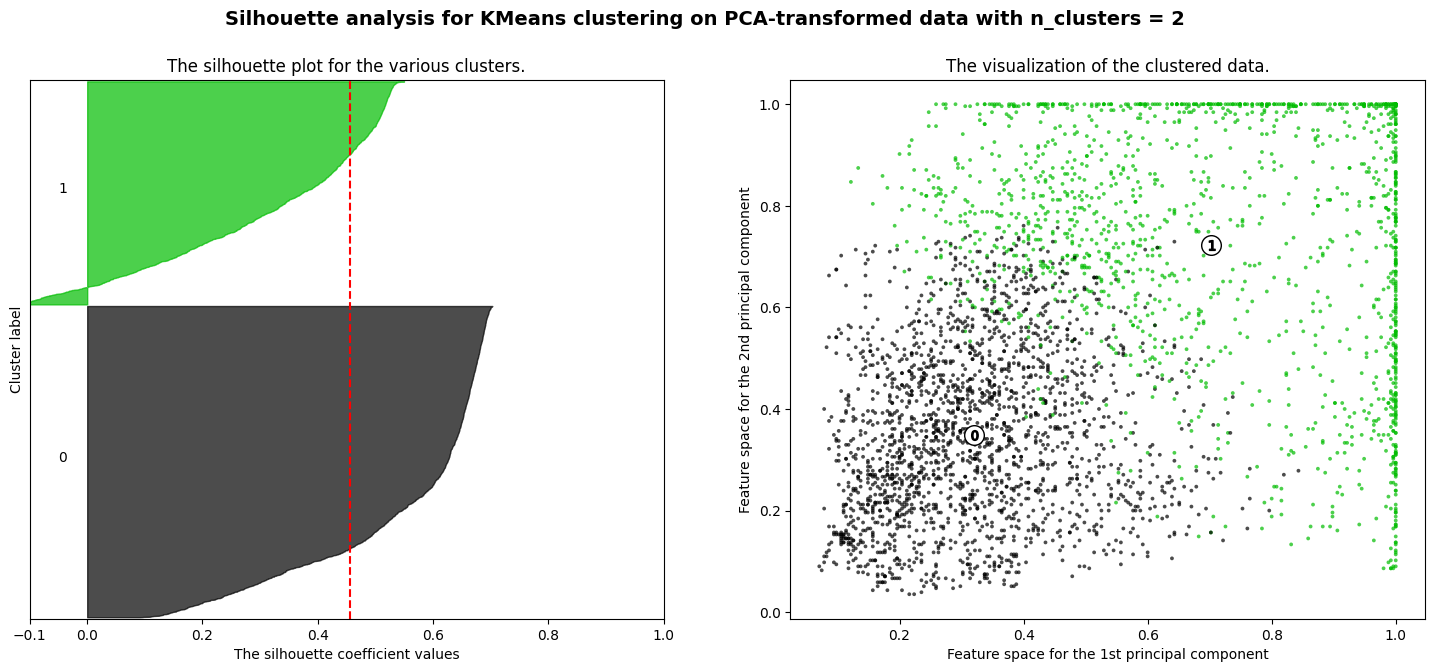

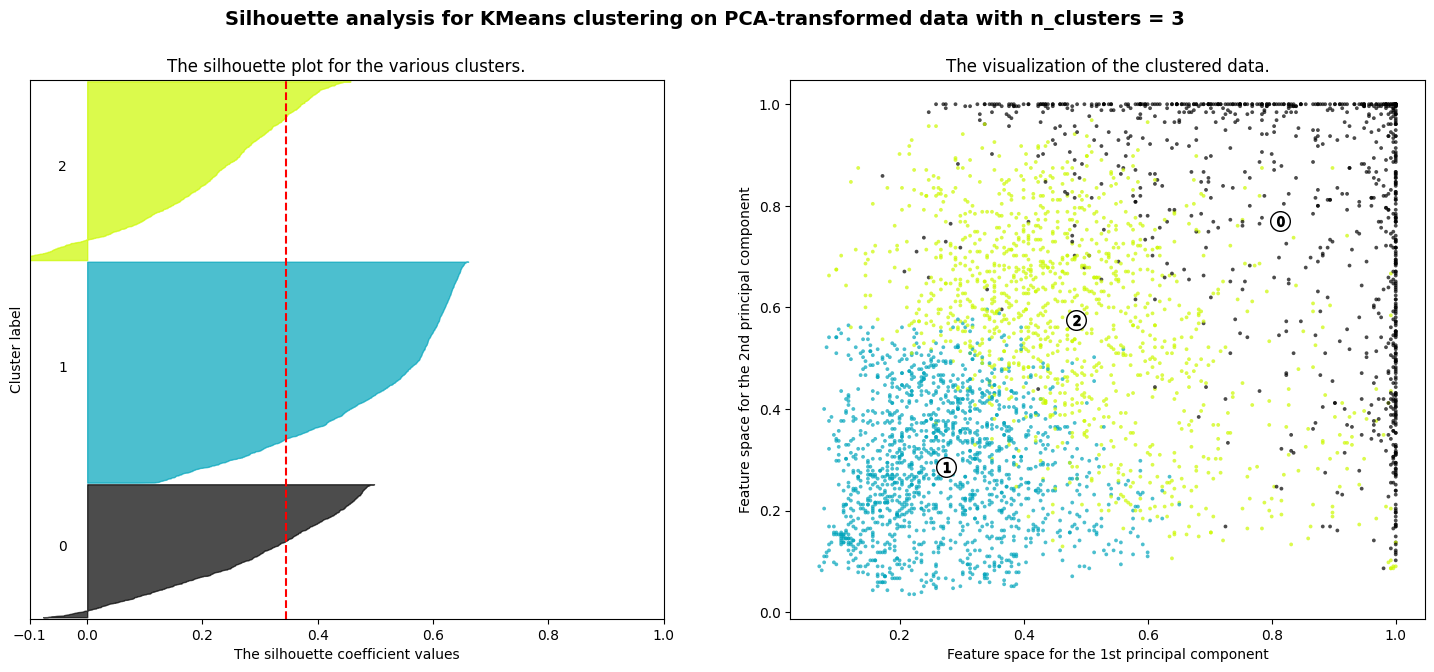

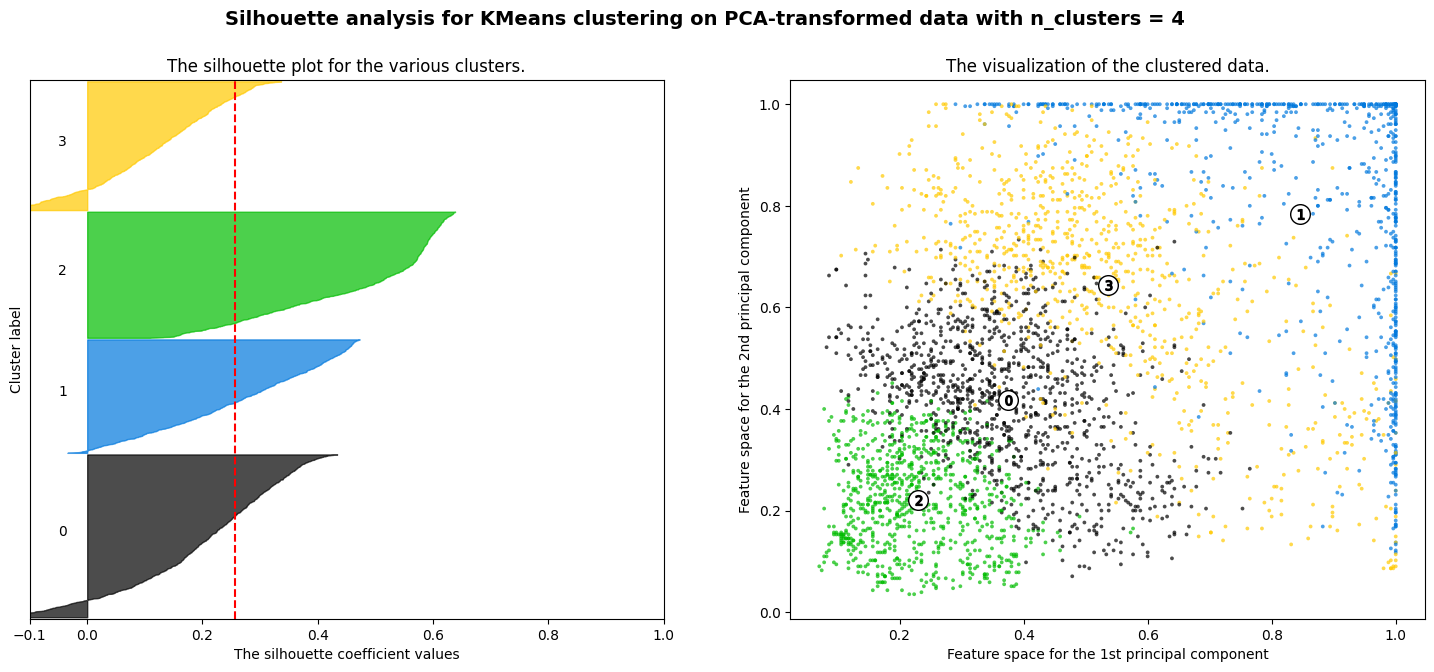

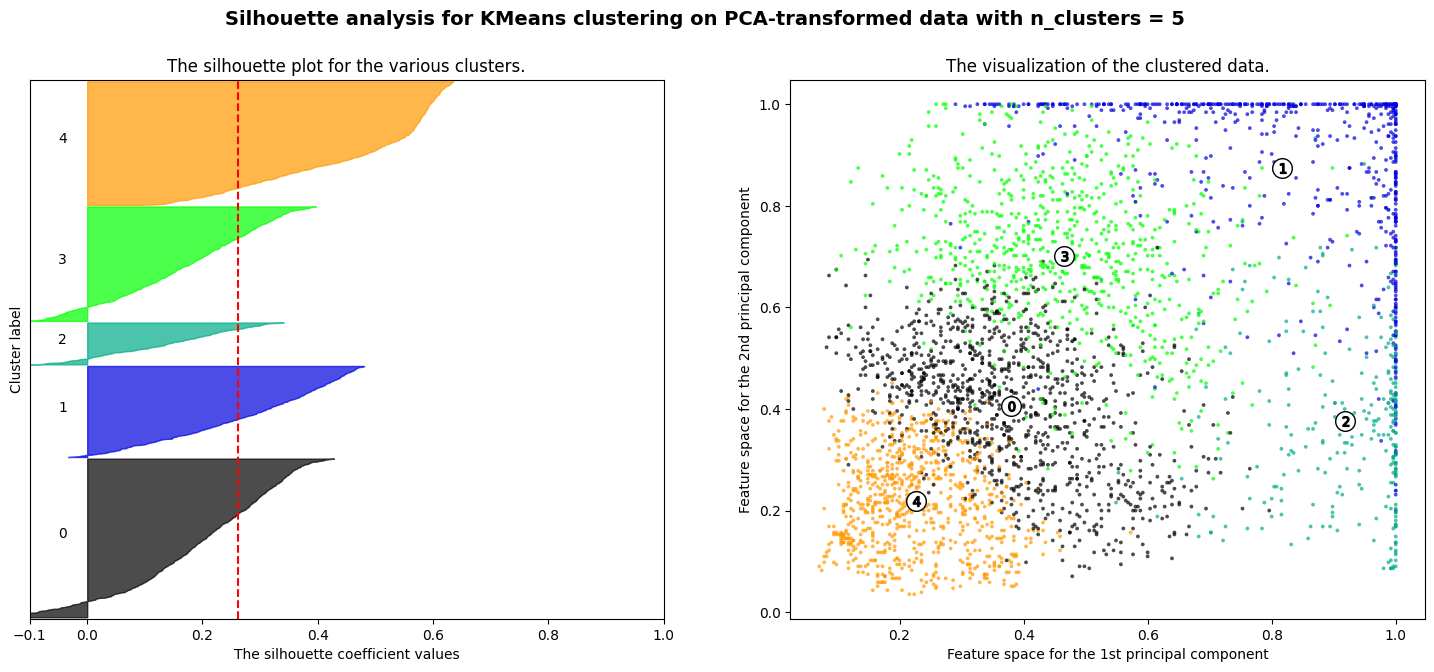

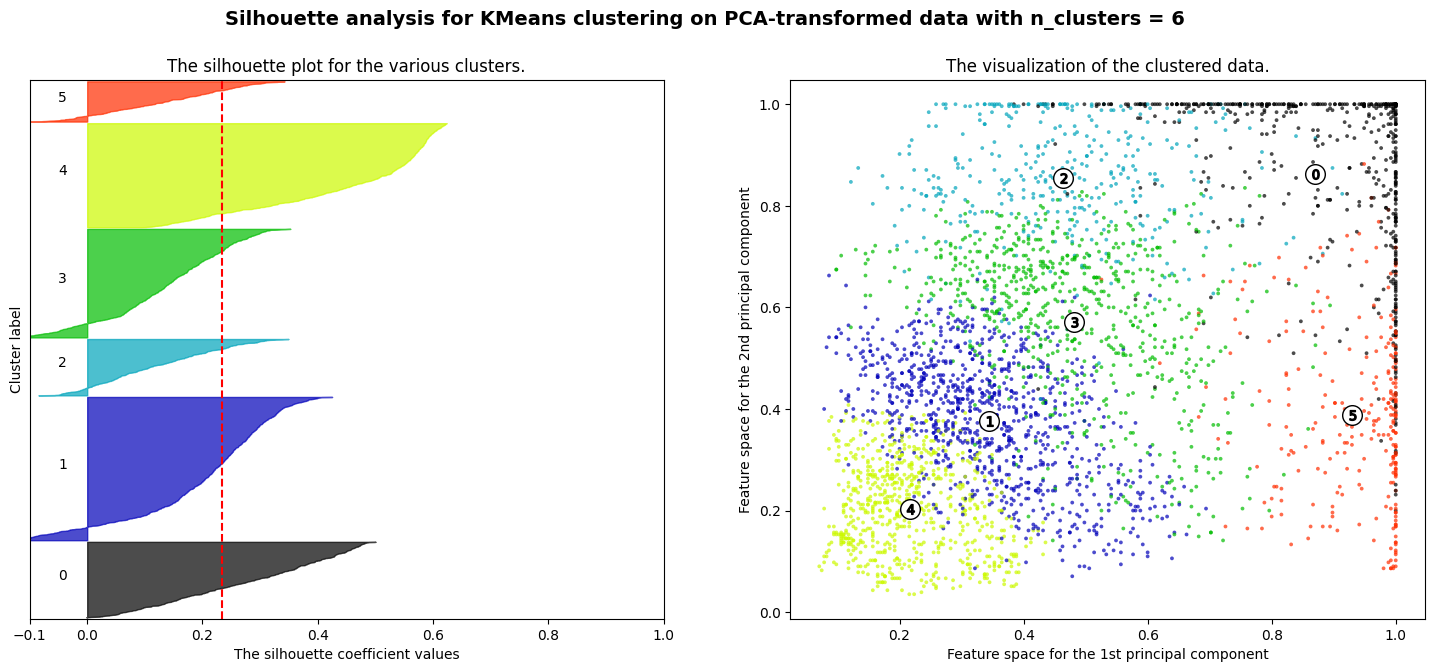

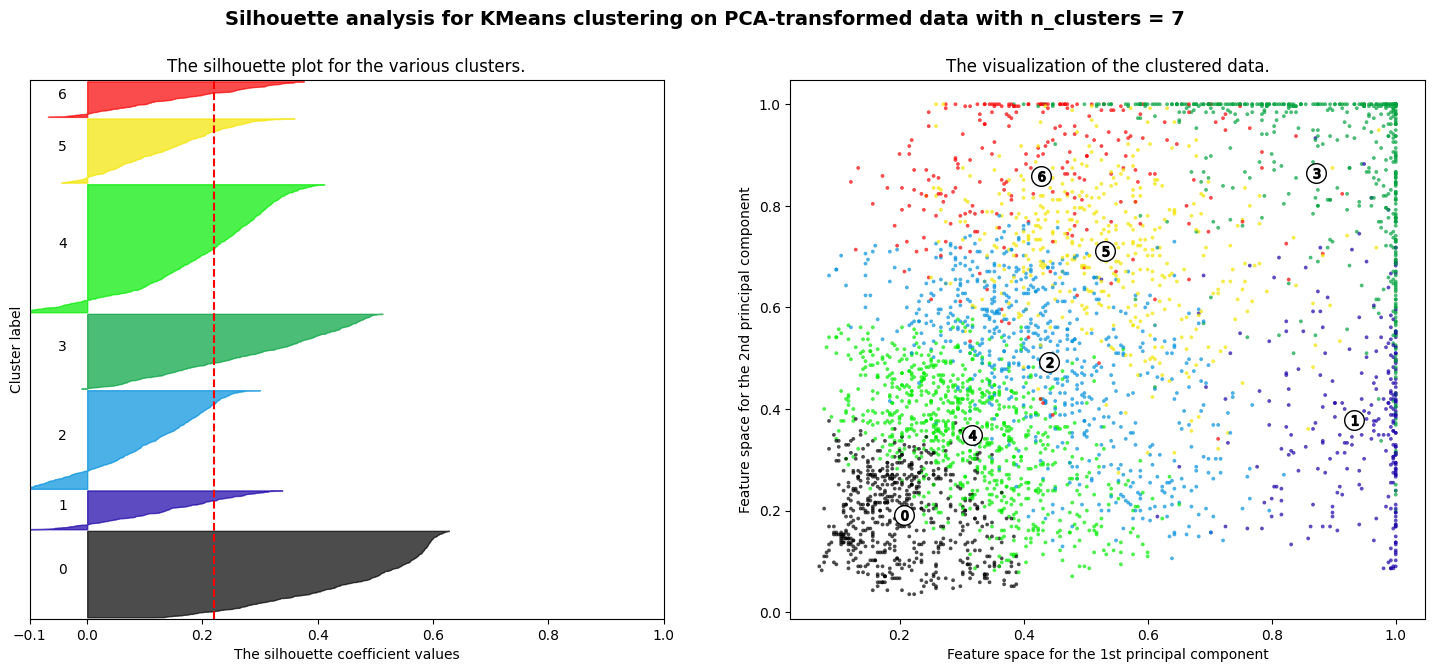

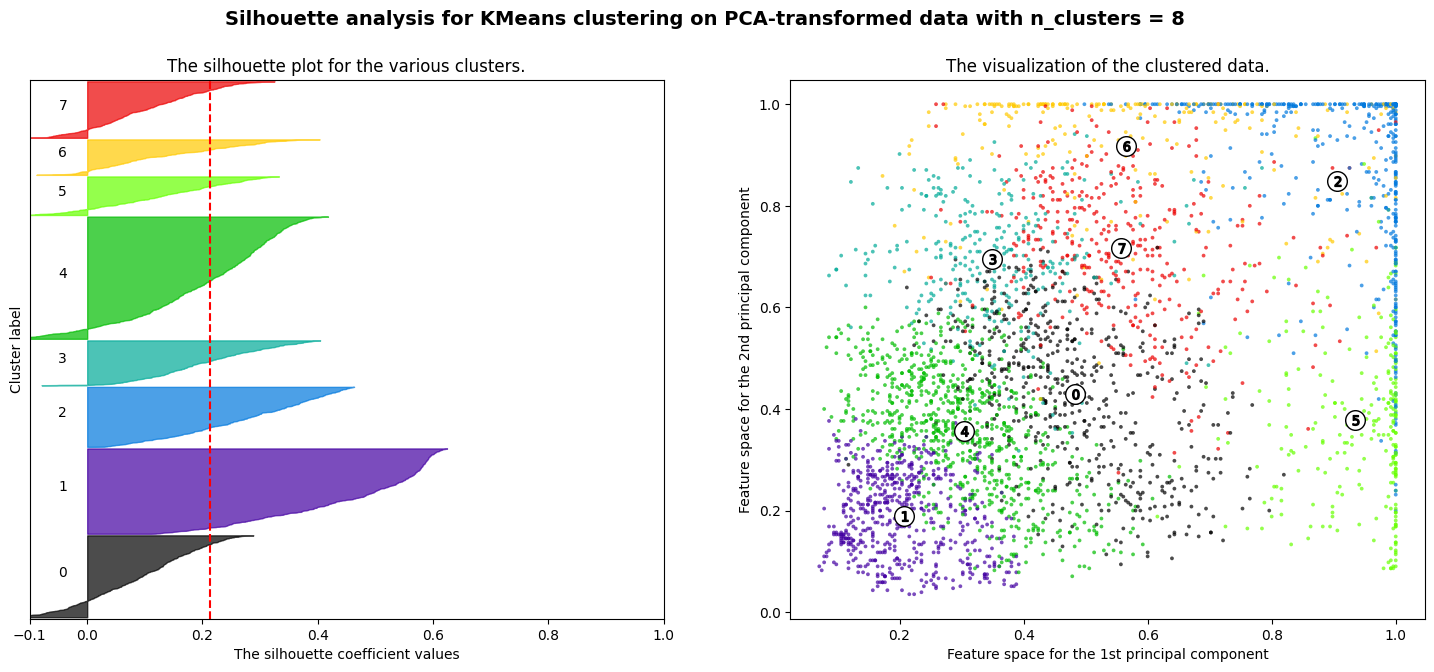

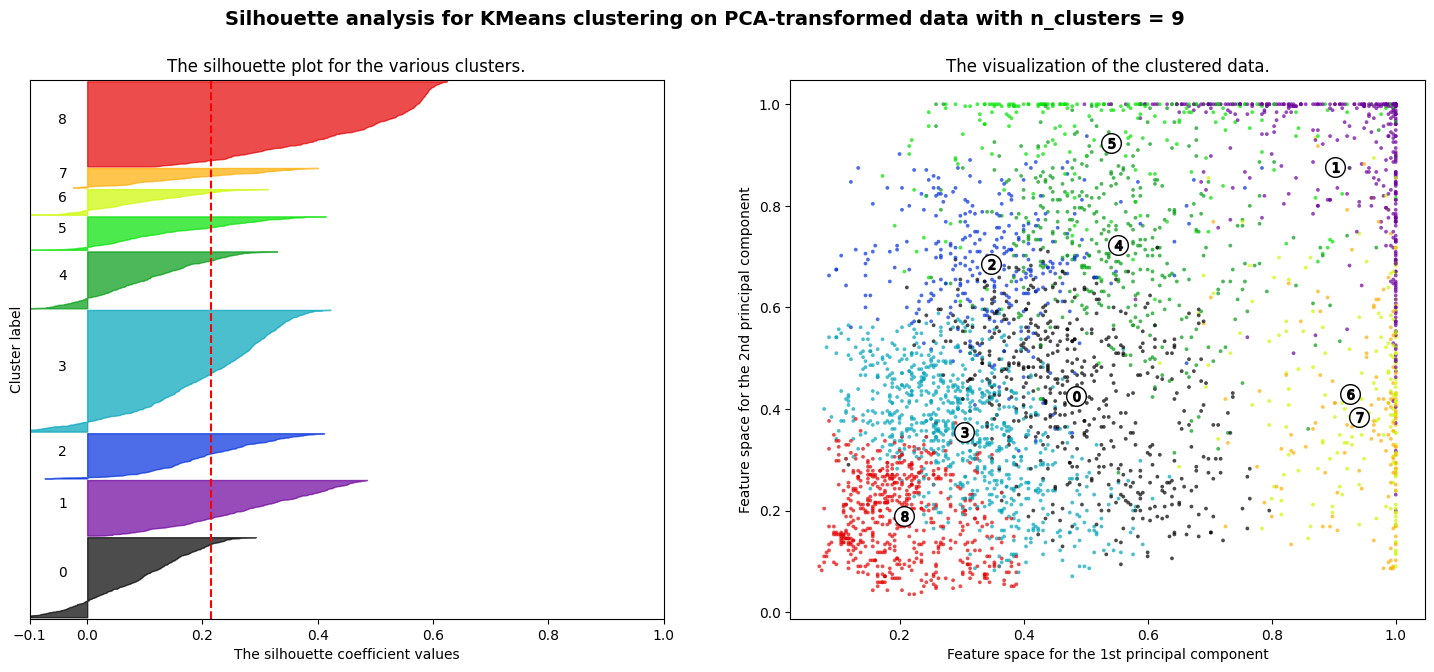

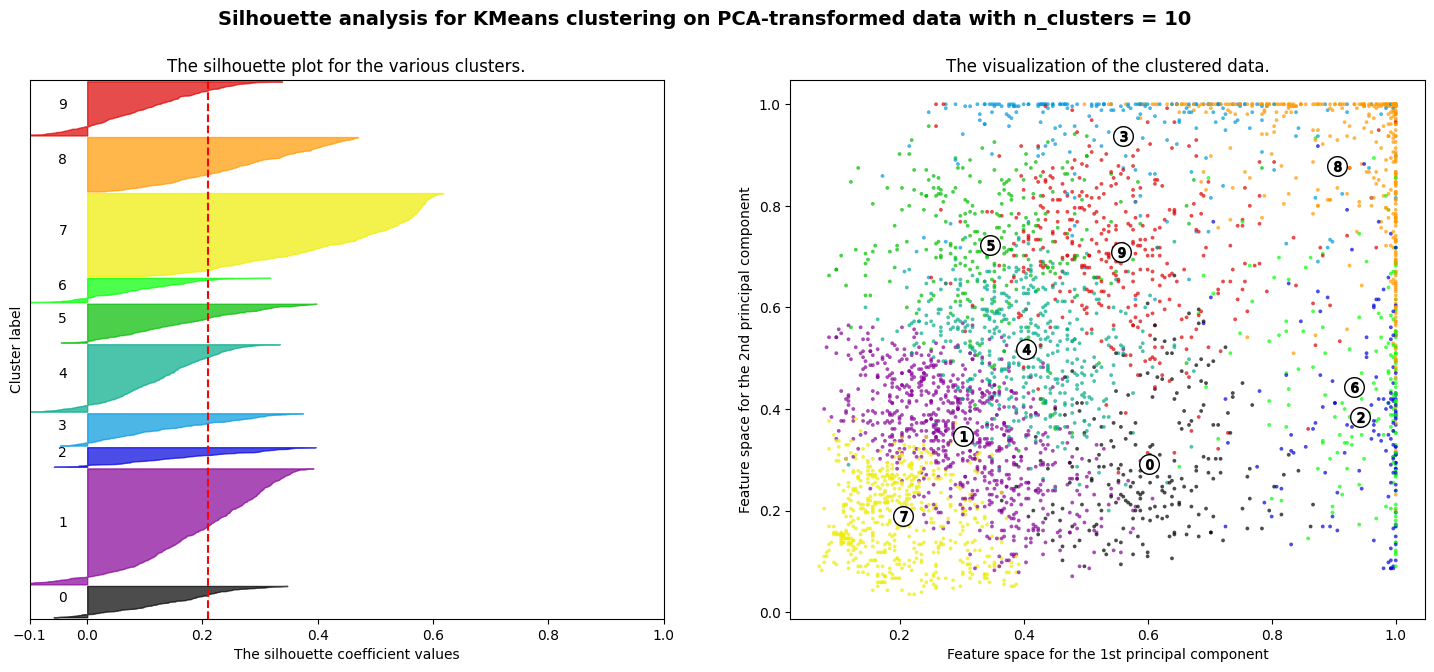

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# Convert the DataFrame to a NumPy array
X = X_train_filtered.to_numpy()
y = y_train_filtered.to_numpy().ravel()

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg.round(3)}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st principal component")
    ax2.set_ylabel("Feature space for the 2nd principal component")

    plt.suptitle((f"Silhouette analysis for KMeans clustering on PCA-transformed data "
                  f"with n_clusters = {n_clusters}"),
                 fontsize=14, fontweight='bold')

plt.show()